# Data Preproccessing

In [ ]:
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Flatten, Embedding, Reshape, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax,RMSprop
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from tqdm import tqdm
import plotly.express as px
plt.rcParams['font.size'] =  12
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/intel-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Test and Train path
train_dir = "/content/seg_train/seg_train"
test_dir = "/content/seg_test/seg_test"

In [ ]:
training_data = []
test_data = []
labels = os.listdir(train_dir)
for folder in os.listdir(train_dir):
    training_data.append(len(os.listdir(os.path.join(train_dir,folder))))

for folder in os.listdir(test_dir):
    test_data.append(len(os.listdir(os.path.join(test_dir,folder))))

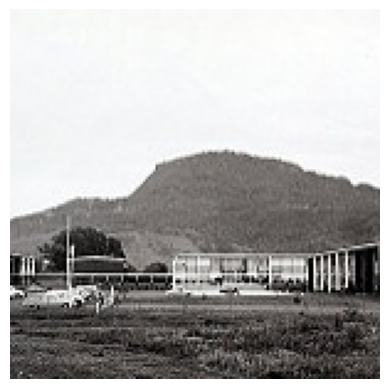

In [ ]:
# Visualize image to check correctness
img = load_img(train_dir + "/buildings/0.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
# The images size in dataset.
image_shape = img_to_array(img)
print(image_shape.shape)

(150, 150, 3)


In [ ]:
fig = px.bar(x=labels, y=test_data, title='Class Count Test Data')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

In [ ]:
batch_size = 32
img_size = 150

datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.15)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = datagen.flow_from_directory(train_dir,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                subset='training',
                                                class_mode='categorical')

validation_generator = datagen.flow_from_directory(train_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    subset='validation',
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(img_size, img_size),
                                                 batch_size=batch_size,
                                                 shuffle=False,
                                                 class_mode='categorical')

Found 11932 images belonging to 6 classes.
Found 2102 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


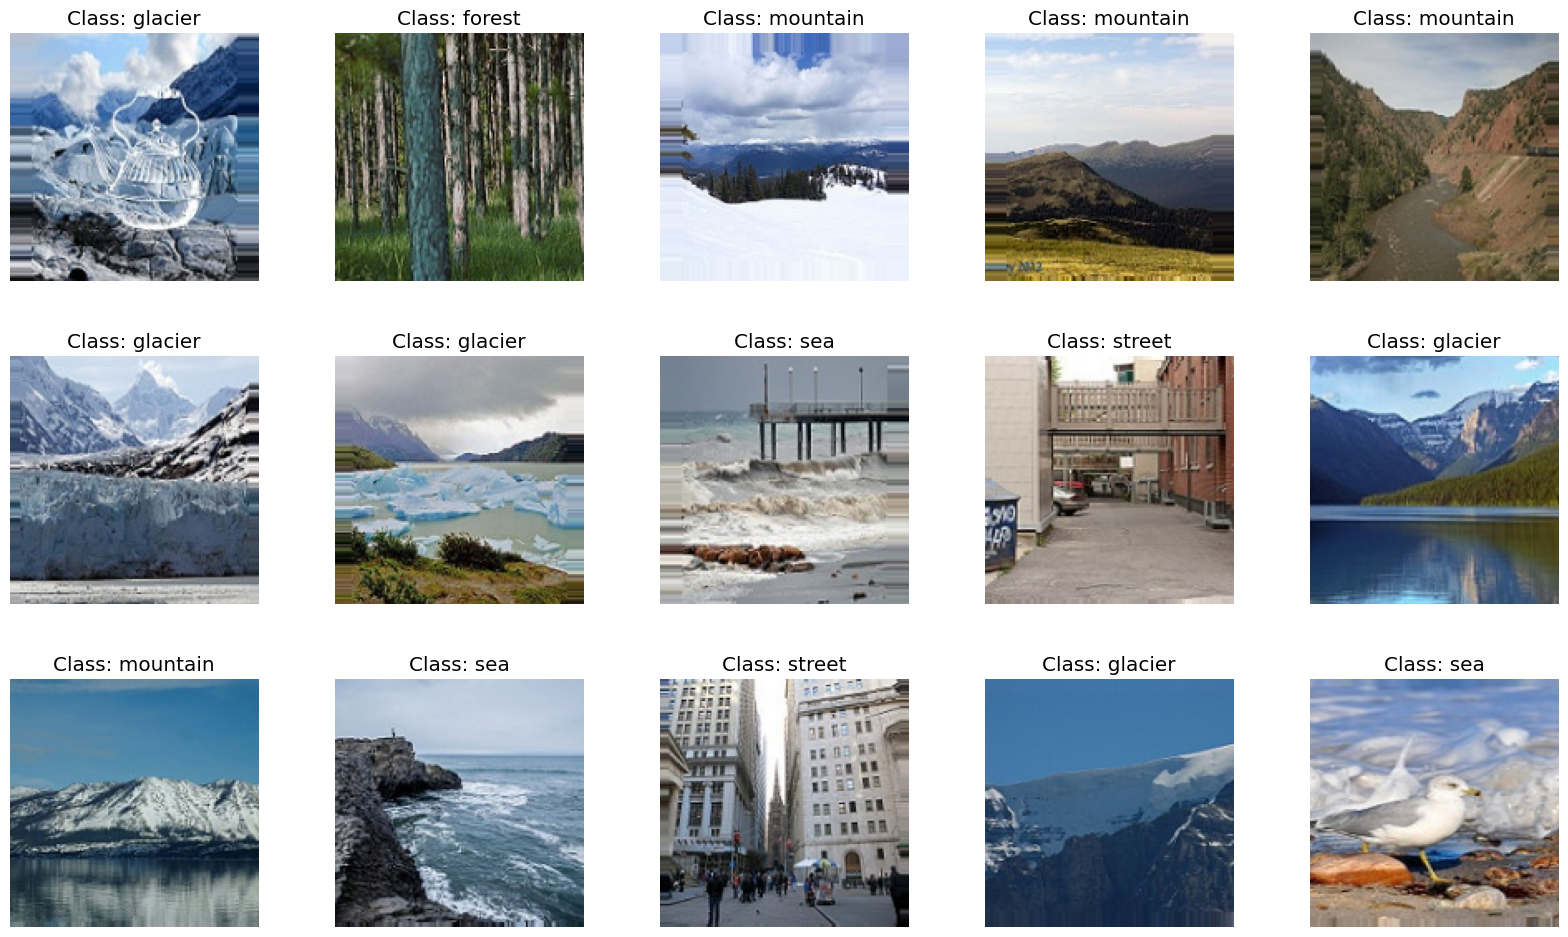

In [ ]:
labels = [k for k,v in train_generator.class_indices.items()]
sample_generate = train_generator.__next__()
images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

#InceptionV3(Pretrained)

In [ ]:
imgsize = (150, 150, 3)
InceptionV3_model = Sequential()
pretrained_model = tf.keras.applications.InceptionV3(include_top=False,
                                                  input_shape=imgsize,
                                                  pooling='max',
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
for layer in pretrained_model.layers[-4:]:
    layer.trainable = True
InceptionV3_model.add(pretrained_model)
InceptionV3_model.add(layers.Flatten())
InceptionV3_model.add(layers.Dense(128, activation='relu'))
InceptionV3_model.add(layers.Dropout(0.2))
InceptionV3_model.add(layers.Dense(6, activation='softmax'))
InceptionV3_model.compile(optimizer=RMSprop(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
history = InceptionV3_model.fit(train_generator, validation_data=validation_generator, epochs=20)
InceptionV3_model.save('inception.h5')

Epoch 1/20
373/373 [==============================] - 101s 250ms/step - loss: 0.7158 - accuracy: 0.7512 - val_loss: 0.4908 - val_accuracy: 0.8154
Epoch 2/20
373/373 [==============================] - 98s 262ms/step - loss: 0.4365 - accuracy: 0.8465 - val_loss: 0.4025 - val_accuracy: 0.8616
Epoch 3/20
373/373 [==============================] - 90s 241ms/step - loss: 0.3820 - accuracy: 0.8638 - val_loss: 0.3453 - val_accuracy: 0.8844
Epoch 4/20
373/373 [==============================] - 91s 245ms/step - loss: 0.3537 - accuracy: 0.8771 - val_loss: 0.3467 - val_accuracy: 0.8754
Epoch 5/20
373/373 [==============================] - 90s 241ms/step - loss: 0.3369 - accuracy: 0.8803 - val_loss: 0.3296 - val_accuracy: 0.8811
Epoch 6/20
373/373 [==============================] - 93s 249ms/step - loss: 0.3196 - accuracy: 0.8838 - val_loss: 0.3423 - val_accuracy: 0.8806
Epoch 7/20
373/373 [==============================] - 89s 238ms/step - loss: 0.3049 - accuracy: 0.8876 - val_loss: 0.3319 - val_a

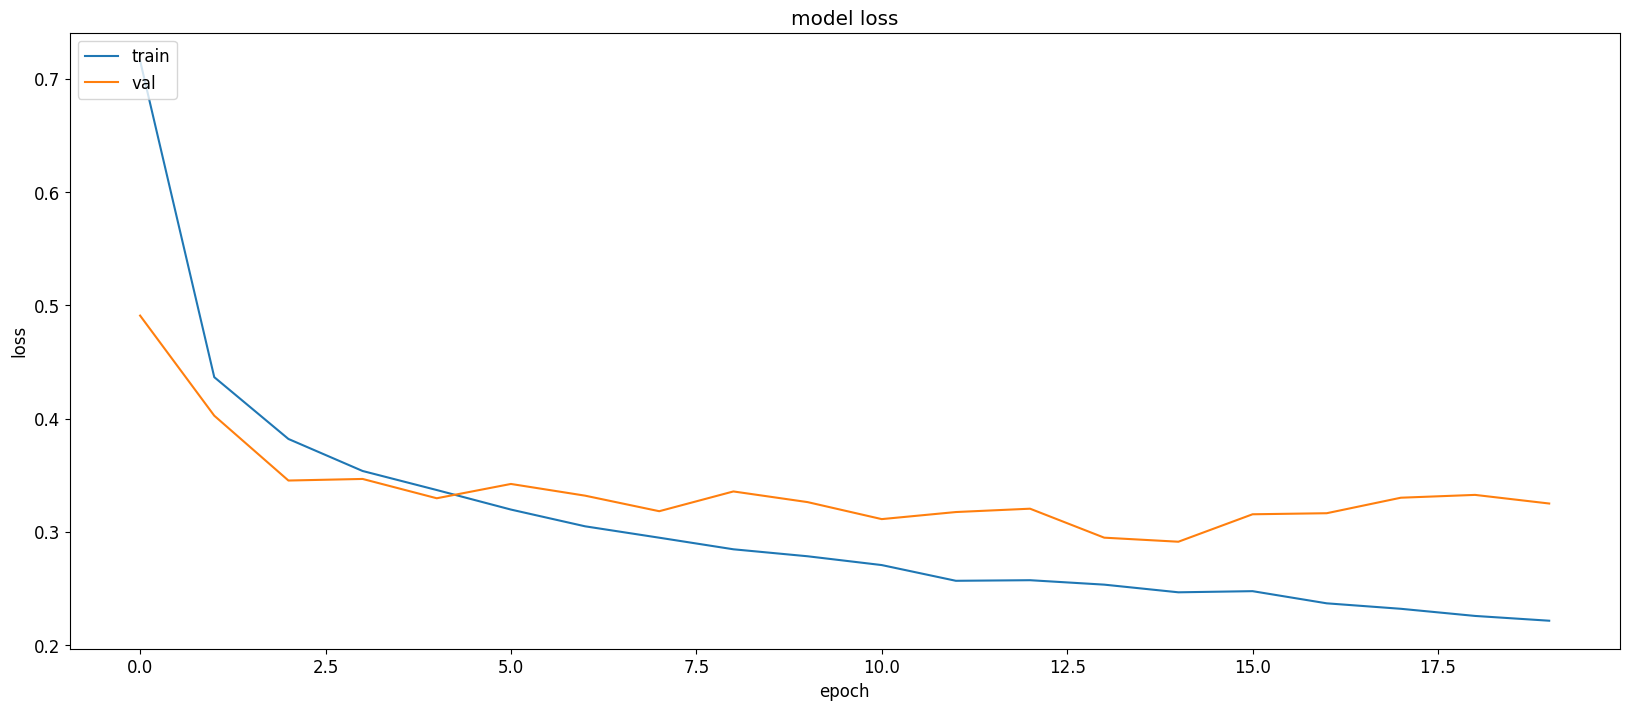

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

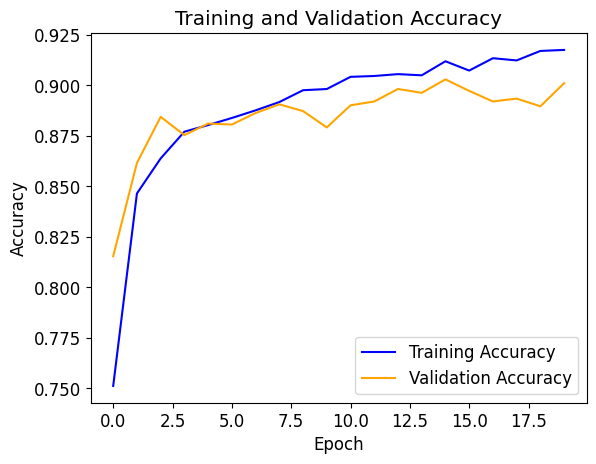

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score=InceptionV3_model.evaluate(test_generator,verbose =1 )

94/94 [==============================] - 5s 57ms/step - loss: 0.3141 - accuracy: 0.8913


In [ ]:
y_test = test_generator.classes
y_pred = InceptionV3_model.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

94/94 [==============================] - 6s 40ms/step


In [ ]:
print(classification_report(y_test,y_pred,target_names = labels))

              precision    recall  f1-score   support

   buildings       0.93      0.85      0.89       437
      forest       1.00      0.97      0.98       474
     glacier       0.84      0.81      0.83       553
    mountain       0.80      0.84      0.82       525
         sea       0.93      0.94      0.93       510
      street       0.88      0.95      0.91       501

    accuracy                           0.89      3000
   macro avg       0.90      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



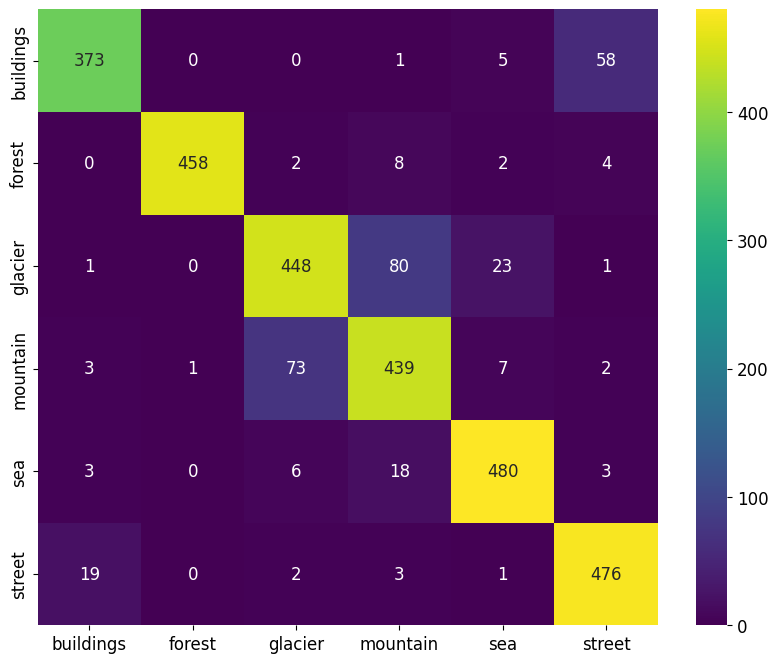

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=labels,yticklabels=labels,cmap='viridis')
plt.show()